In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ]
)

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

dt_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

dt_pred = dt_pipeline.predict(X_test)
rf_pred = rf_pipeline.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))


Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Decision Tree Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Random Forest Confusion Matrix:
[[1

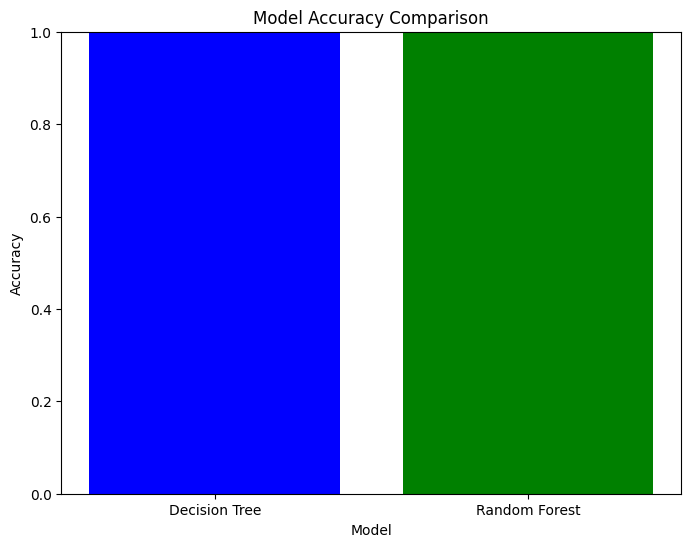

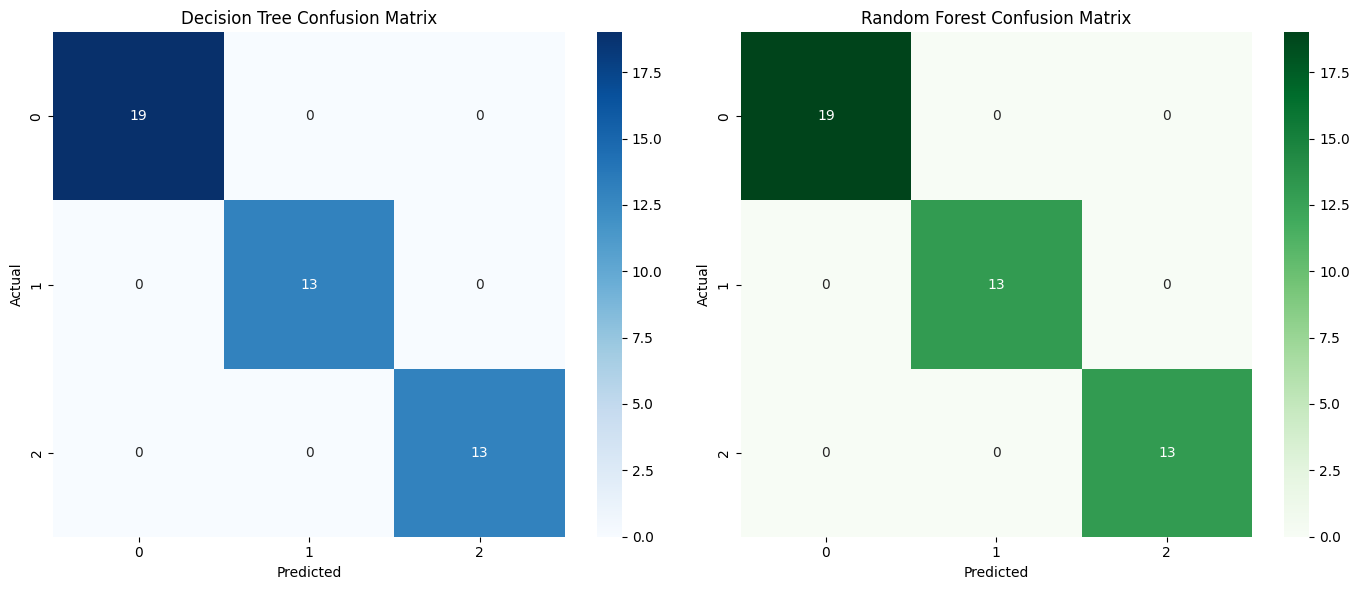

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Accuracy Comparison Bar Plot
accuracies = [dt_accuracy, rf_accuracy]
models = ['Decision Tree', 'Random Forest']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

# Confusion Matrix Heatmaps
dt_cm = confusion_matrix(y_test, dt_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Decision Tree Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
